In [1]:
!pip install lazypredict --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.7/24.7 MB 78.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 733.8/733.8 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.2/196.2 kB 13.5 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from lazypredict.Supervised import LazyClassifier
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("Mobile_phone_pricing.csv")
print(df.shape)
df.head()

Saving Mobile_phone_pricing.csv to Mobile_phone_pricing.csv
(2000, 21)


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
#Target splitting
X = df.drop('price_range', axis=1)
y = df['price_range']
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [5]:
#Lazyclassifier Benchmark
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test, y_train, y_test)

# Show top models sorted by accuracy
models_sorted = models.sort_values(by="Accuracy", ascending=False)
models_sorted.head(10)


  0%|          | 0/32 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000540 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1370
[LightGBM] [Info] Number of data points in the train set: 1600, number of used features: 20
[LightGBM] [Info] Start training from score -1.398873
[LightGBM] [Info] Start training from score -1.364044
[LightGBM] [Info] Start training from score -1.366492
[LightGBM] [Info] Start training from score -1.416754
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LogisticRegression,0.97,0.97,None,0.98,0.20
LinearDiscriminantAnalysis,0.94,0.95,None,0.95,0.12
QuadraticDiscriminantAnalysis,0.94,0.94,None,0.94,0.12
LGBMClassifier,0.91,0.91,None,0.91,0.70
XGBClassifier,0.91,0.90,None,0.91,0.69
RandomForestClassifier,0.89,0.89,None,0.89,1.59
SVC,0.89,0.89,None,0.89,0.31
NuSVC,0.89,0.89,None,0.89,0.39
CalibratedClassifierCV,0.88,0.86,None,0.87,0.15


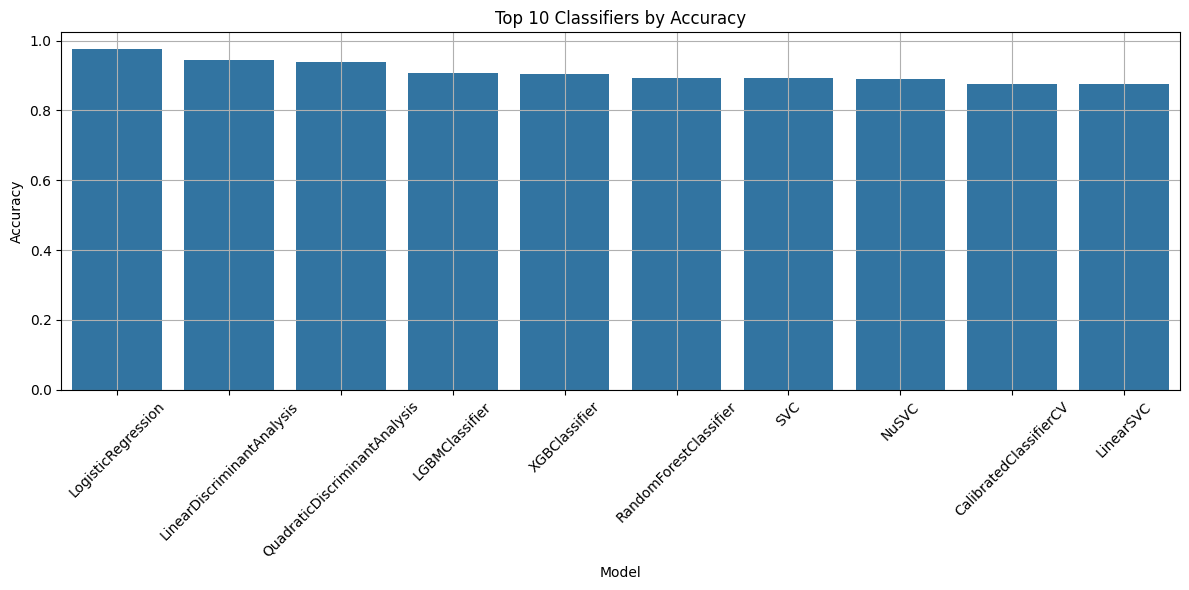

In [6]:
#Visualisation
plt.figure(figsize=(12,6))
sns.barplot(x=models_sorted.head(10).index, y=models_sorted["Accuracy"].head(10))
plt.title("Top 10 Classifiers by Accuracy")
plt.ylabel("Accuracy")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

In [8]:
#Model training
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8875

Confusion Matrix:
 [[100   5   0   0]
 [  6  78   7   0]
 [  0  10  76   6]
 [  0   0  11 101]]

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       105
           1       0.84      0.86      0.85        91
           2       0.81      0.83      0.82        92
           3       0.94      0.90      0.92       112

    accuracy                           0.89       400
   macro avg       0.88      0.88      0.88       400
weighted avg       0.89      0.89      0.89       400



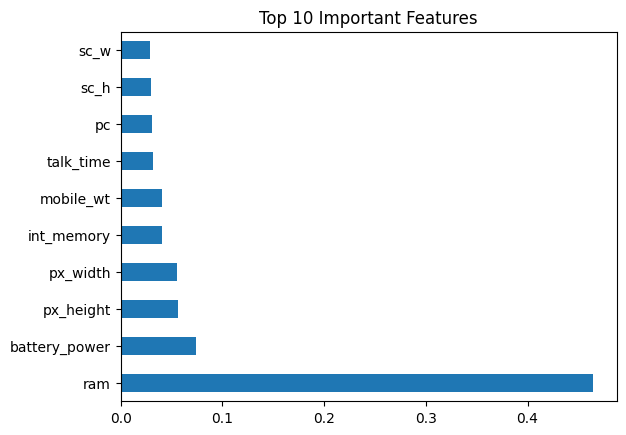

In [9]:
#Feature importance
importances = pd.Series(model.feature_importances_, index=df.columns[:-1])
importances.nlargest(10).plot(kind='barh', title='Top 10 Important Features')
plt.show()